<a href="https://colab.research.google.com/github/Joul1207/BioDynamics/blob/main/Copy_of_Ecology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **📘 Project Title:**

### Bird Migration and Ecological Impact System

---


## **📍 Introduction**
Bird migration is a vital ecological phenomenon that connects distant ecosystems and affects numerous environmental processes along the way. Migratory birds not only travel long distances between breeding and wintering grounds, but they also interact with the environment—feeding on insects, dispersing seeds, and influencing plant health. Understanding how these seasonal movements affect other living organisms is essential for ecological research and conservation planning.


In this project, we explore the relationship between bird migration and environmental factors—specifically insect populations and plant growth—using real-world data collected from **Bosque del Apache**, **USA** during the year 2023. The bird species observed in this study include the **Sandhill Crane, Snow Goose, Duck, and American Avocet**, all of which are known to migrate through or inhabit wetland ecosystems.

---

## **🎯 Research Question**
How does bird migration affect the surrounding ecosystem, particularly insect populations and plant growth?

---

## **🧪 Methodology**
We analyzed a dataset that includes:

* Bird species and estimated daily counts

* Insect types and population levels

* Plant growth index, rainfall, and temperature data

We applied various data analysis and visualization methods to examine correlations and patterns, including:

* An interactive dashboard for exploring bird–insect–plant relationships

* Predator-prey simulation using the Lotka–Volterra model

* Principal Component Analysis (PCA) for dimensionality reduction

* Random Forest models to simulate ecosystem interactions

---

## **🌍 Goal of the Study**
The goal is to better understand the ecological impact of migrating birds and identify measurable effects on insect activity and vegetation development. By combining real-world observations with ecological modeling, we aim to highlight the role of migratory birds as both insect regulators and ecosystem enhancers.


#✈


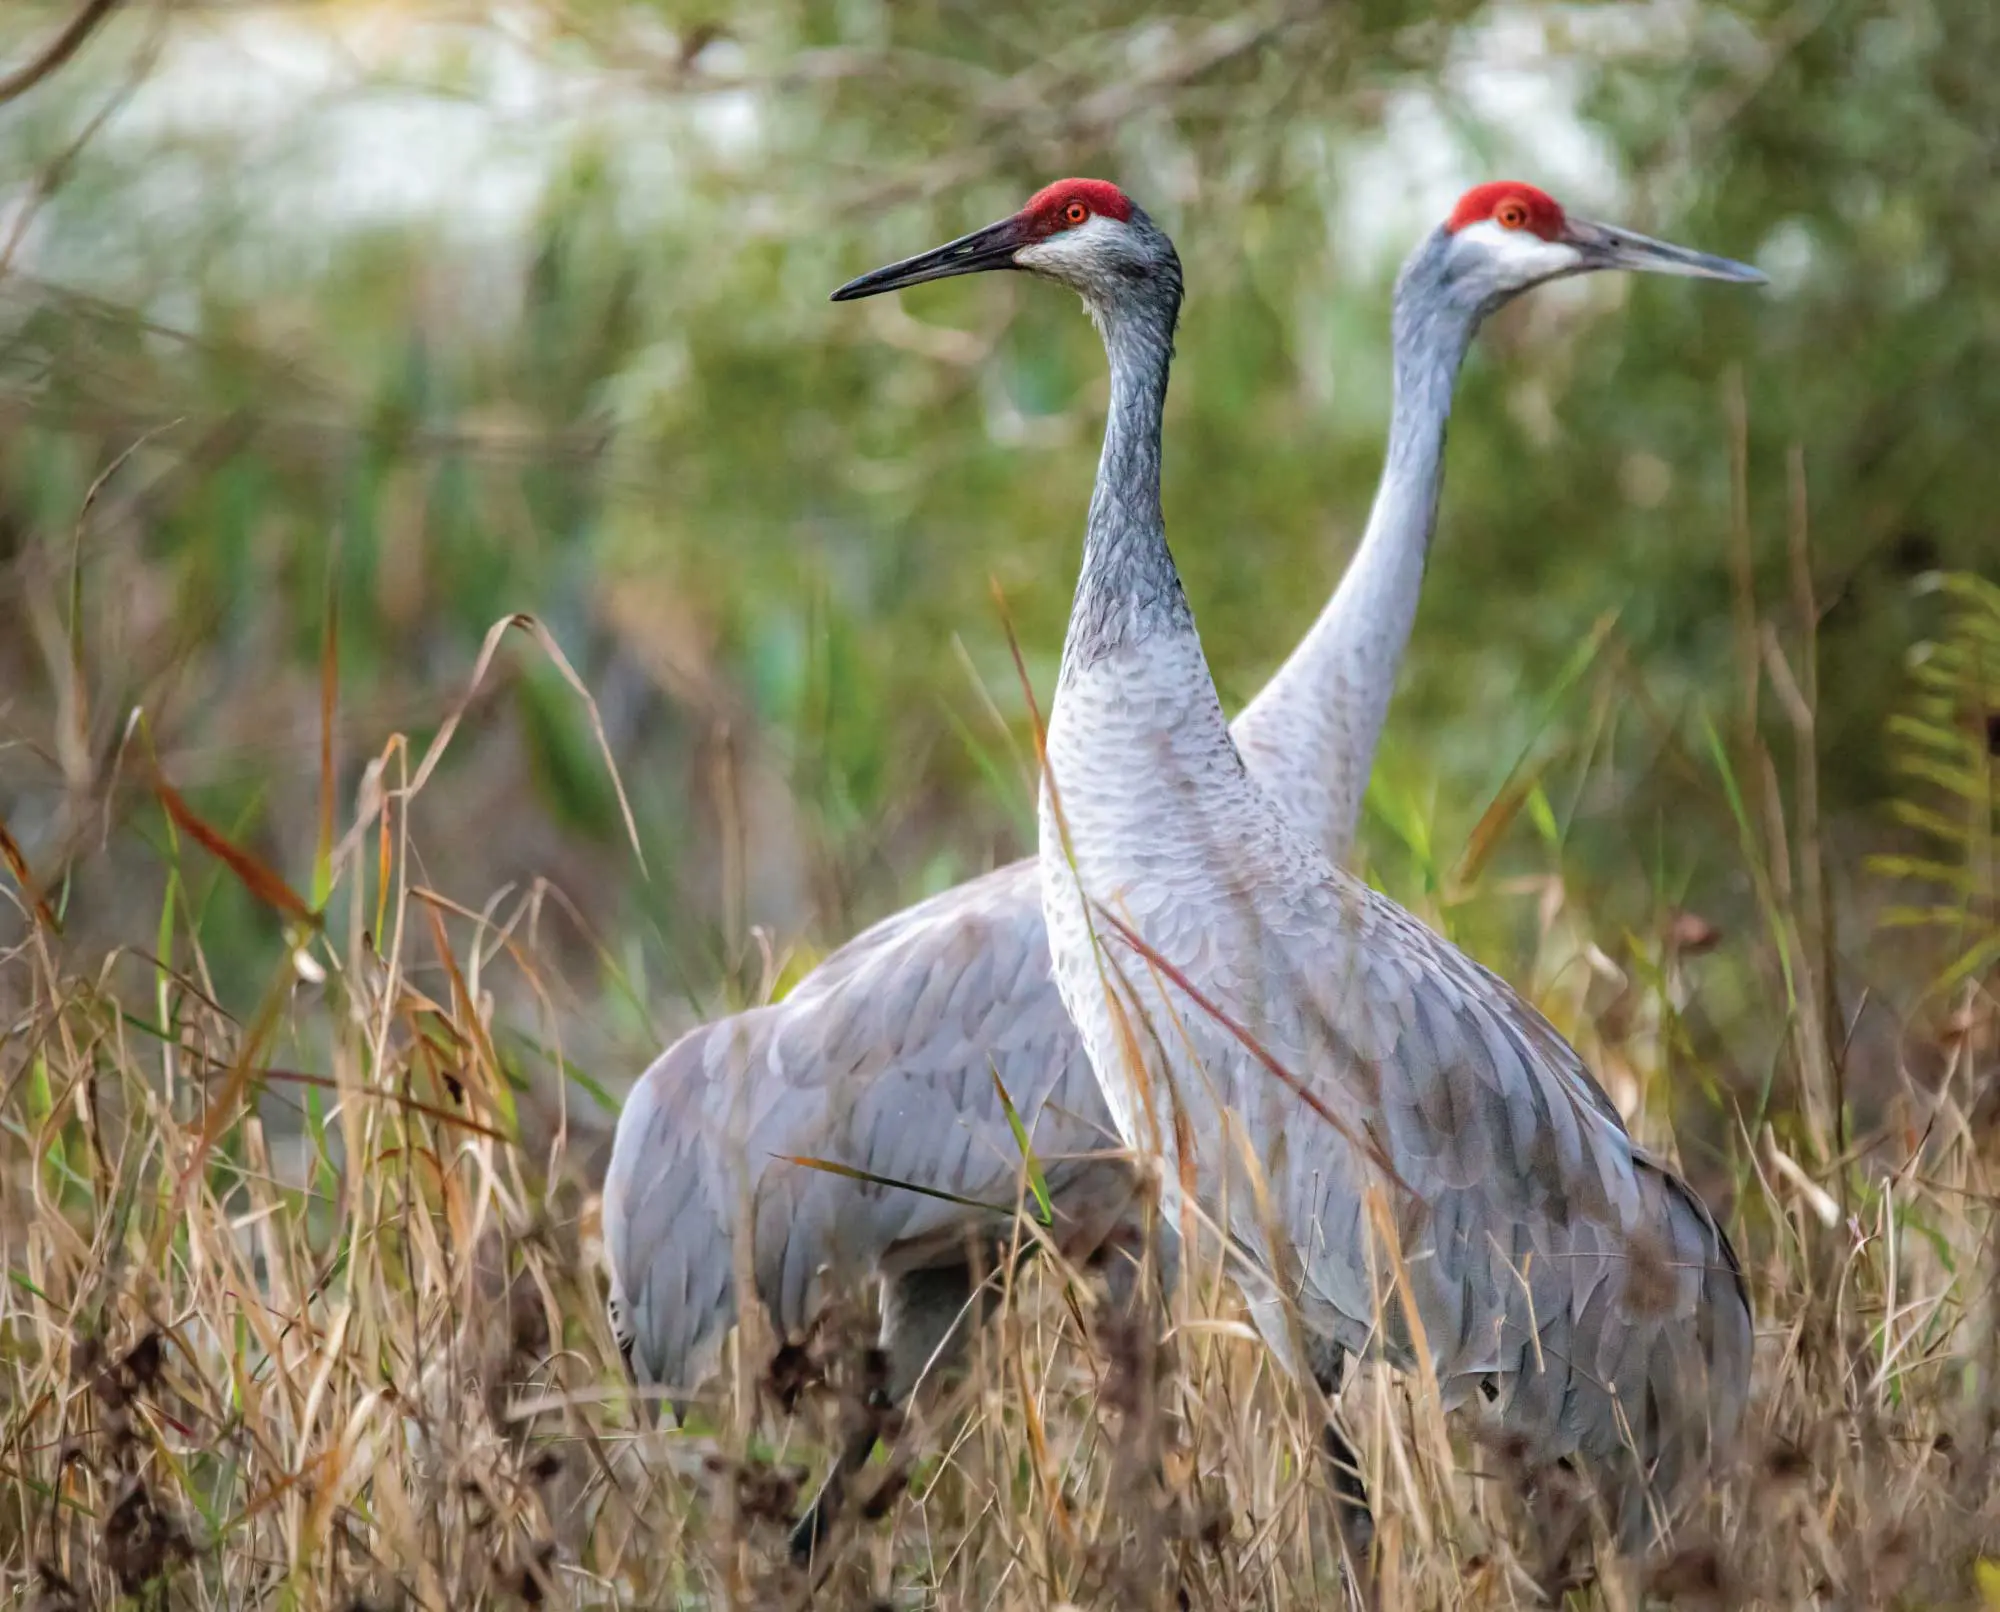

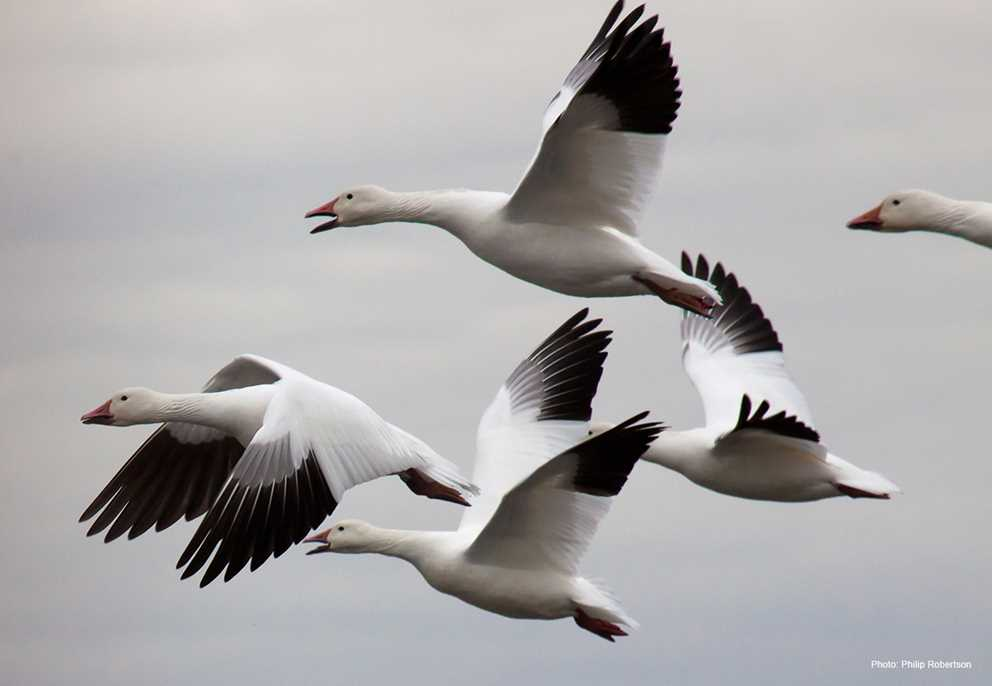

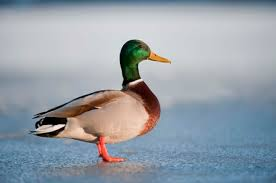

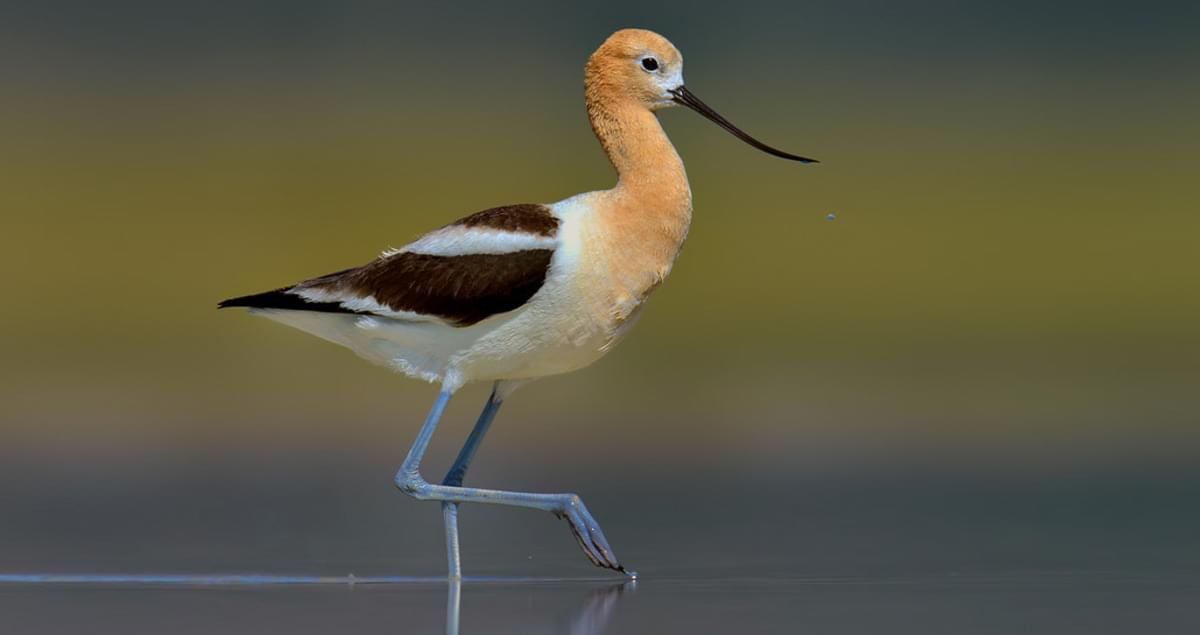

In [ ]:
# Display bird species images with captions
from IPython.display import Image, display, HTML

display(HTML("<h3>Bird Species and Their Ecological Roles</h3>"))

# Sandhill Crane
display(Image(filename='sandhill_crane.jpg', width=300))
display(HTML("<b>Sandhill Crane</b><br>Migrates long distances and helps regulate wetland insect populations.<br><br>"))

# Snow Goose
display(Image(filename='snow_goose.jpg', width=300))
display(HTML("<b>Snow Goose</b><br>Feeds on grasses and sedges, influencing plant cover in wetland areas.<br><br>"))

# Duck
display(Image(filename='duck.jpg', width=300))
display(HTML("<b>Duck</b><br>Consumes aquatic insects and helps control pest populations in ponds and fields.<br><br>"))

# Avocet
display(Image(filename='avocet.jpg', width=300))
display(HTML("<b>American Avocet</b><br>Wades in shallow water, feeding on invertebrates and balancing wetland life.<br><br>"))


This interactive dashboard allows users to explore the relationship between bird migration, insect populations, and plant growth over time. It includes the following features:

* **Bird Species Selector:** Choose a bird species to focus on.

* **Plot Type Selector:** Switch between two key visualizations:

  *   Bird Count vs. Insect Population
  *   Bird Count vs. Plant Growth Index

* **Scale Toggle:** View the data in either:

  * **Absolute values** (actual counts/measurements)

  * **Normalized values** (scaled from 0 to 1 for comparison)

* **Date Range Filter:** Select a specific time period to analyze changes over time.

* **Summary Statistics:** Optionally display basic statistics (mean, min, max) for the selected variables and date range



In [ ]:
!pip install -q ipywidgets

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
from datetime import datetime

# Load your data
df = pd.read_excel("Data.xlsx")
df['Date'] = pd.to_datetime(df['Date'])

# Widgets
bird_species = sorted(df['Bird_Species'].unique())
plot_options = ['Bird Count vs Insect Population', 'Bird Count vs Plant Growth']

bird_dropdown = widgets.Dropdown(options=bird_species, value=bird_species[0], description='Bird Species:')
plot_dropdown = widgets.Dropdown(options=plot_options, value=plot_options[0], description='Plot Type:')
value_scale = widgets.ToggleButtons(options=['Absolute', 'Normalized'], value='Absolute', description='Scale:')
show_stats = widgets.Checkbox(value=False, description='Show Summary Stats')

date_range = widgets.SelectionRangeSlider(
    options=sorted(df['Date'].dt.date.unique()),
    index=(0, len(df['Date'].dt.date.unique()) - 1),
    description='Date Range:',
    orientation='horizontal',
    layout={'width': '90%'}
)

# Main dashboard function
def update(bird, plot_type, scale, show_stats, date_range):
    start_date, end_date = pd.to_datetime(date_range)
    filtered_df = df[(df['Bird_Species'] == bird) & (df['Date'] >= start_date) & (df['Date'] <= end_date)]

    agg_df = filtered_df.groupby('Date').agg({
        'Estimated_Bird_Count': 'sum',
        'Insect_Population': 'mean',
        'Plant_Growth_Index': 'mean'
    }).reset_index()

    # Normalize values if selected
    if scale == 'Normalized':
        agg_df[['Estimated_Bird_Count', 'Insect_Population', 'Plant_Growth_Index']] = (
            agg_df[['Estimated_Bird_Count', 'Insect_Population', 'Plant_Growth_Index']]
            .apply(lambda x: (x - x.min()) / (x.max() - x.min()))
        )

    # Plot
    plt.figure(figsize=(9, 4))
    if plot_type == 'Bird Count vs Insect Population':
        sns.lineplot(data=agg_df, x='Date', y='Estimated_Bird_Count', label='Bird Count')
        sns.lineplot(data=agg_df, x='Date', y='Insect_Population', label='Insect Population')
    else:
        sns.lineplot(data=agg_df, x='Date', y='Estimated_Bird_Count', label='Bird Count')
        sns.lineplot(data=agg_df, x='Date', y='Plant_Growth_Index', label='Plant Growth Index')
    plt.title(f"{bird} – {plot_type} ({scale})")
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Show summary statistics
    if show_stats:
        stats = agg_df.describe().loc[['mean', 'min', 'max']][['Estimated_Bird_Count', 'Insect_Population', 'Plant_Growth_Index']]
        display(stats)

# Display dashboard
ui = widgets.VBox([bird_dropdown, plot_dropdown, value_scale, date_range, show_stats])
out = widgets.interactive_output(update, {
    'bird': bird_dropdown,
    'plot_type': plot_dropdown,
    'scale': value_scale,
    'show_stats': show_stats,
    'date_range': date_range
})

display(ui, out)



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.9 MB/s eta 0:00:00


Output()

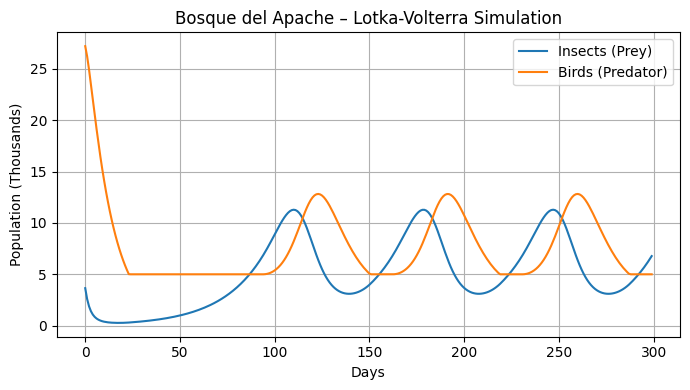

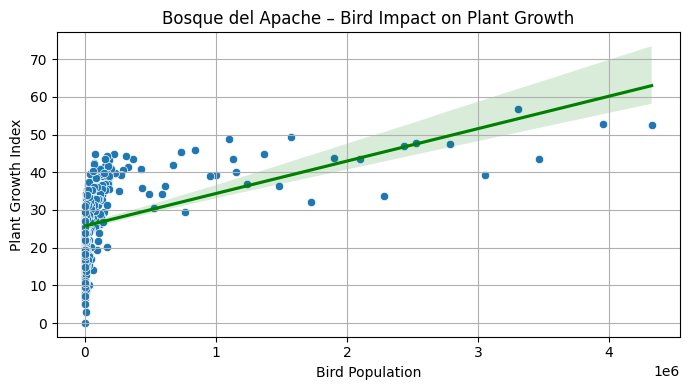

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the Excel file (Bosque del Apache only)
df = pd.read_excel("Data.xlsx")
df['Date'] = pd.to_datetime(df['Date'])

# 2. Aggregate by day (no need to group by Location anymore)
agg_df = df.groupby('Date').agg({
    'Estimated_Bird_Count': 'sum',
    'Insect_Population': 'mean',
    'Plant_Growth_Index': 'mean'
}).reset_index()

# 3. Lotka–Volterra helper
def simulate_lv(bird_start, insect_start, days,
                alpha=0.12, beta=0.015, delta=0.012, gamma=0.08):
    birds   = [bird_start   / 1000]   # rescale for plotting
    insects = [insect_start / 1000]
    for _ in range(1, days):
        prey, pred = insects[-1], birds[-1]
        insects.append(max(prey + (alpha*prey - beta*prey*pred), 0.2))
        birds  .append(max(pred + (delta*prey*pred - gamma*pred), 5))
    return np.arange(days), insects, birds

# 4. Run simulation and plot
days = len(agg_df)
x, insects, birds = simulate_lv(
    bird_start   = agg_df['Estimated_Bird_Count'].iloc[0],
    insect_start = agg_df['Insect_Population'   ].iloc[0],
    days = days
)

plt.figure(figsize=(7, 4))
plt.plot(x, insects, label='Insects (Prey)')
plt.plot(x, birds,   label='Birds (Predator)')
plt.title("Bosque del Apache – Lotka-Volterra Simulation")
plt.xlabel("Days")
plt.ylabel("Population (Thousands)")
plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()

# 5. Bird population vs. plant growth plot
plt.figure(figsize=(7, 4))
sns.scatterplot(data=agg_df, x='Estimated_Bird_Count', y='Plant_Growth_Index')
sns.regplot   (data=agg_df, x='Estimated_Bird_Count', y='Plant_Growth_Index',
               scatter=False, color="green")
plt.title("Bosque del Apache – Bird Impact on Plant Growth")
plt.xlabel("Bird Population")
plt.ylabel("Plant Growth Index")
plt.grid(True); plt.tight_layout()
plt.show()


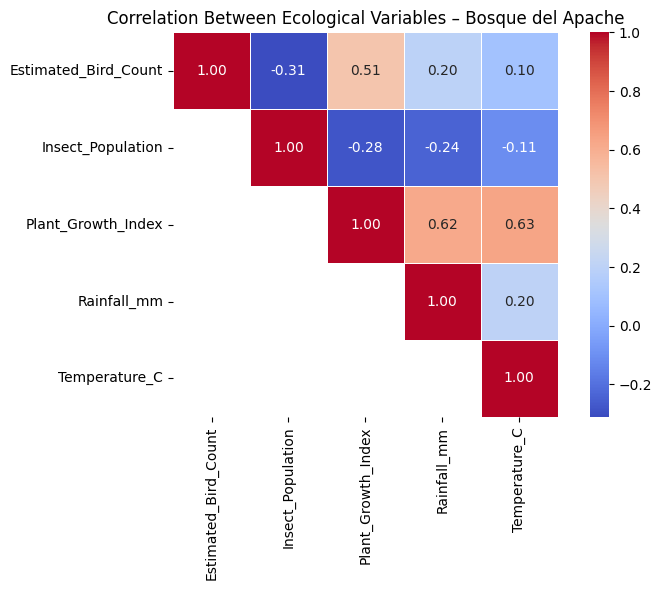

In [ ]:
# Filter only for "Bosque del Apache"
bosque_df = df[df['Location'] == 'Bosque del Apache']

# Select relevant columns
correlation_df_bosque = bosque_df[[
    'Estimated_Bird_Count',
    'Insect_Population',
    'Plant_Growth_Index',
    'Rainfall_mm',
    'Temperature_C'
]]

# Compute correlation matrix
corr = correlation_df_bosque.corr()

# Create lower triangle mask
mask = np.tril(np.ones_like(corr, dtype=bool), k=-1)

# Identify the highest absolute correlation (excluding duplicates and diagonals)
max_corr_value = corr.where(mask).abs().max().max()
max_pair = corr.where(mask).abs().stack().idxmax()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Between Ecological Variables – Bosque del Apache")
plt.tight_layout()
plt.show()



**Explanation for PCA axes:**

* **PC1 shows a strong positive contribution from Bird Count and Plant Growth Index, and a negative loading from Insect Population. This suggests an inverse relationship between birds and insects: as birds increase, insects decrease.**

* **PC2 reflects environmental conditions: Rainfall and Temperature are grouped, indicating climate-driven dynamics in the ecosystem.**

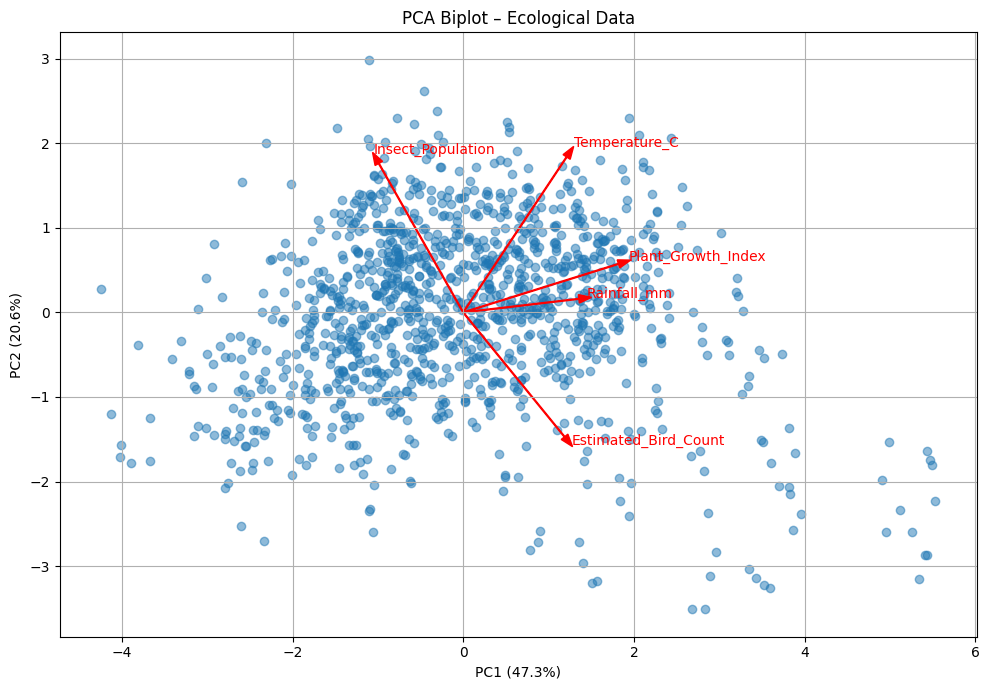

PCA Component Interpretation:

PC1 – Ecological Health Gradient:
This component has high positive loadings for Plant_Growth_Index, Rainfall_mm, Estimated_Bird_Count, and Temperature_C.
→ It represents overall environmental productivity: healthy ecosystems with more birds, rainfall, and plant growth.
→ High PC1 = healthy, productive area.
→ Low PC1 = low-growth, ecologically stressed area.

PC2 – Bird–Insect Interaction Axis:
This component shows a strong negative relationship between birds and insects, and positive loading for temperature.
→ It captures predator-prey dynamics and thermal stress.
→ High PC2 = more insects, fewer birds, warmer conditions.
→ Low PC2 = more birds, fewer insects, cooler conditions.


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Load and define features
df = pd.read_excel("Data.xlsx")

features = ['Estimated_Bird_Count',
            'Insect_Population',
            'Plant_Growth_Index',
            'Rainfall_mm',
            'Temperature_C']

data = df[features].dropna()

# 2. Standardize and run PCA
x_scaled = StandardScaler().fit_transform(data)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(x_scaled)

# 3. Create PCA biplot
plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)

# Draw vectors for each original feature
for i, feature in enumerate(features):
    plt.arrow(0, 0,
              pca.components_[0, i] * 3,
              pca.components_[1, i] * 3,
              color='r', width=0.01, head_width=0.1)
    plt.text(pca.components_[0, i] * 3.2,
             pca.components_[1, i] * 3.2,
             feature, color='r')

# Axis labels & title
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.title("PCA Biplot – Ecological Data")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Print interpretation of PCA components ---
print("PCA Component Interpretation:\n")

print("PC1 – Ecological Health Gradient:")
print("This component has high positive loadings for Plant_Growth_Index, Rainfall_mm, Estimated_Bird_Count, and Temperature_C.")
print("→ It represents overall environmental productivity: healthy ecosystems with more birds, rainfall, and plant growth.")
print("→ High PC1 = healthy, productive area.")
print("→ Low PC1 = low-growth, ecologically stressed area.\n")

print("PC2 – Bird–Insect Interaction Axis:")
print("This component shows a strong negative relationship between birds and insects, and positive loading for temperature.")
print("→ It captures predator-prey dynamics and thermal stress.")
print("→ High PC2 = more insects, fewer birds, warmer conditions.")
print("→ Low PC2 = more birds, fewer insects, cooler conditions.")




**This scatter plot shows a three-way interaction: where bird counts are high, insect populations tend to be lower, and plant growth is higher.**

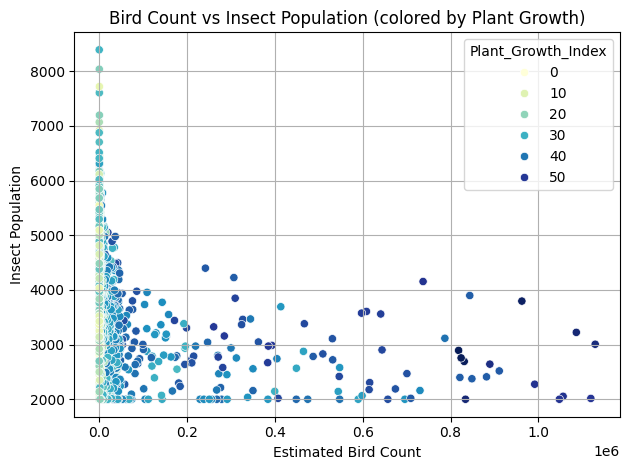

In [ ]:
# Visualizing Bird Count vs Insect Population, colored by Plant Growth
sns.scatterplot(data=df, x='Estimated_Bird_Count', y='Insect_Population', hue='Plant_Growth_Index', palette='YlGnBu')
plt.title("Bird Count vs Insect Population (colored by Plant Growth)")
plt.xlabel("Estimated Bird Count")
plt.ylabel("Insect Population")
plt.grid(True)
plt.tight_layout()
plt.show()


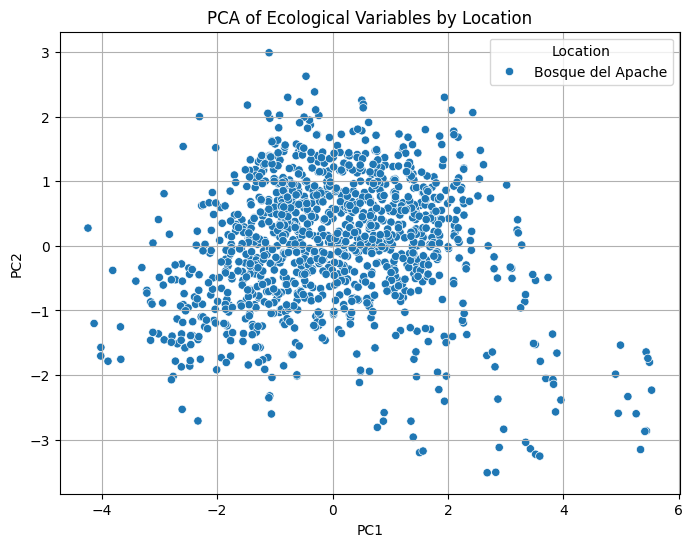

PC1 = Environmental health (e.g., rainfall, plant growth, birds)

PC2 = Biological interaction (birds vs. insects) influenced by climate


In [ ]:
features = [
    'Estimated_Bird_Count',
    'Insect_Population',
    'Plant_Growth_Index',
    'Rainfall_mm',
    'Temperature_C'
]
x = df[features].dropna()

# Standardize data (important for PCA)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Optional: Add location info for coloring
pca_df['Location'] = df['Location'].values[:len(pca_df)]

# Plot PCA result
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Location')
plt.title("PCA of Ecological Variables by Location")
plt.grid(True)
plt.show()
print("PC1 = Environmental health (e.g., rainfall, plant growth, birds)\n")
print("PC2 = Biological interaction (birds vs. insects) influenced by climate")

In [ ]:
loadings = pd.DataFrame(pca.components_.T,
                        columns=['PC1', 'PC2'],
                        index=features)
display(loadings)


,PC1,PC2
Estimated_Bird_Count,0.395746,-0.490209
Insect_Population,-0.329569,0.587263
Plant_Growth_Index,0.606343,0.191183
Rainfall_mm,0.451685,0.053526
Temperature_C,0.403855,0.612700


**KMeans helps identify ecological zones or data patterns that would otherwise be hidden in raw data.**

**The clusters represent different ecological patterns. For example, Cluster 2 shows areas with many birds and few insects — supporting the idea that bird migration regulates insect populations and enhances plant health.**

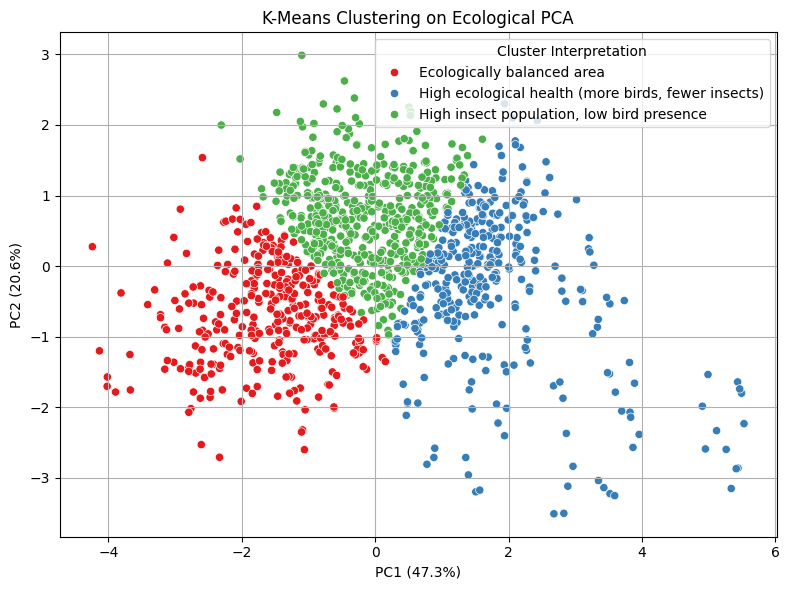

In [ ]:
from sklearn.cluster import KMeans

# Select features and standardize
features = ['Estimated_Bird_Count', 'Insect_Population',
            'Plant_Growth_Index', 'Rainfall_mm', 'Temperature_C']
x = df[features].dropna()
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(x_scaled)
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)
pca_df['Cluster'] = kmeans.fit_predict(pca_df)

# Define human-readable labels for each cluster
cluster_labels = {
    0: 'High insect population, low bird presence',
    1: 'Ecologically balanced area',
    2: 'High ecological health (more birds, fewer insects)'
}

# Plot PCA with clusters and custom legend
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2',
                hue=pca_df['Cluster'].map(cluster_labels), palette='Set1')

plt.title("K-Means Clustering on Ecological PCA")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.legend(title="Cluster Interpretation")
plt.grid(True)
plt.tight_layout()
plt.show()


R² Score: 0.9650422455116532


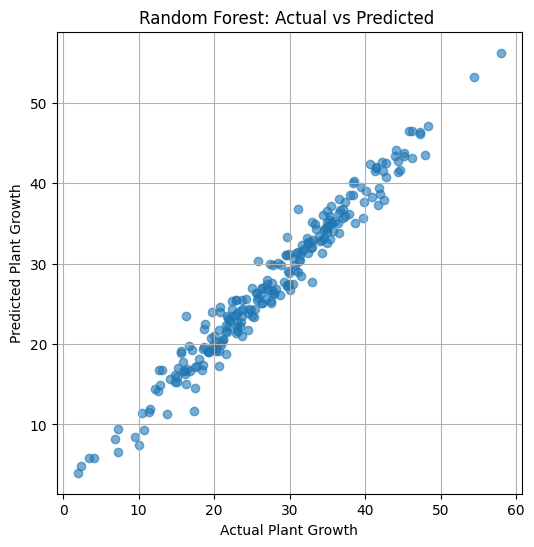


--- Feature Importance ---
Estimated_Bird_Count: 0.584
Temperature_C: 0.312
Rainfall_mm: 0.073
Insect_Population: 0.031


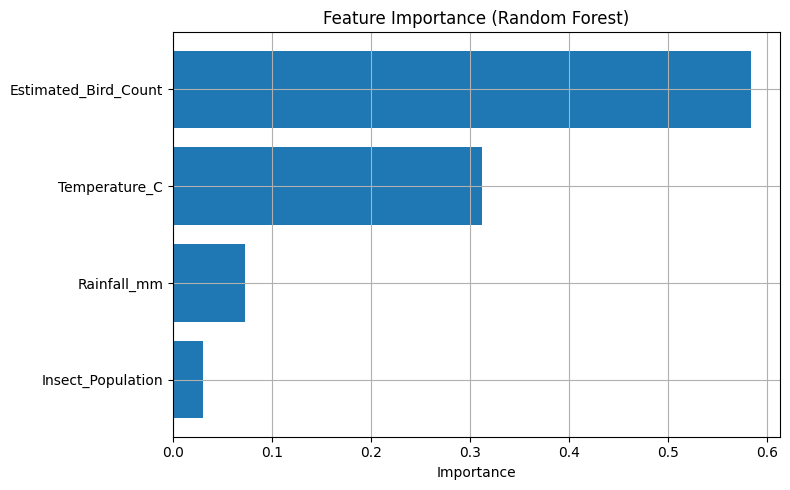

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

features = ['Rainfall_mm', 'Temperature_C', 'Estimated_Bird_Count', 'Insect_Population']
target = 'Plant_Growth_Index'

X = df[features]
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))


plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Plant Growth")
plt.ylabel("Predicted Plant Growth")
plt.title("Random Forest: Actual vs Predicted ")
plt.grid(True)
plt.show()


importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

print("\n--- Feature Importance ---")
for i in sorted_indices:
    print(f"{features[i]}: {importances[i]:.3f}")

plt.figure(figsize=(8, 5))
plt.barh(np.array(features)[sorted_indices], importances[sorted_indices])
plt.xlabel("Importance")
plt.title("Feature Importance (Random Forest)")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.show()